<h1><center>CSE391 programming for data science</center></h1>

<h1><center>DO correlation</center></h1>
<h1><center> </center></h1>




In [11]:
#(')

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

pd.options.display.max_columns = 999
pd.options.display.max_rows = 15

df = pd.read_excel('C:\\Users\\Abe\\Documents\\Python Nonsense\\SmiteDataOceania.xls')

#for x in range(0, 3737):
    #df.set_value(x, 0, str(df.get(x,0)).replace('\n',''))

df.head()

,Name,PlayTime,W/L,KDA,RD elo,RD W/L,RD Played,RJ elo,RJ W/L,RJ Played,RC elo,RC W/L,RC Played,CAr elo,CAr W/L,CAr Played,CAs elo,CAs W/L,CAs Played,CJ elo,CJ W/L,CJ Played,CS elo,CS W/L,CS Played,CCo elo,CCo W/L,CCo Played,CCl elo,CCl W/L,CCl Played,prefMode,prefClass,Region
0,Tiny_ASSassin02,98926,71.00,3.74,1499.0,0.00,1.0,1785.0,80.00,5.0,1517.0,100.00,1.0,2048.0,83.33,60.0,1555.0,66.67,6.0,3383.0,86.78,900.0,1770.0,86.96,23.0,1711.0,73.61,72.0,1862.0,84.21,19.0,Normal: Joust (3v3)\n,Assassin\n,Oceania\n
1,Hashtagdogiebone,34770,54.79,2.75,2023.0,40.91,22.0,1500.0,50.00,2.0,1500.0,60.00,5.0,2066.0,59.15,235.0,1391.0,40.00,5.0,3009.0,57.18,439.0,1493.0,54.55,22.0,1606.0,48.96,96.0,1566.0,54.35,46.0,Normal: Joust (3v3)\n,Assassin\n,Oceania\n
2,Pro_Bling_Jumper,62530,57.35,2.32,1499.0,0.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3013.0,51.70,352.0,1421.0,50.00,2.0,1698.0,50.00,18.0,1493.0,0.00,NaN,Normal: Joust (3v3)\n,Assassin\n,Oceania\n
3,Ragknaar__,18641,54.10,2.36,NaN,NaN,NaN,1476.0,50.00,2.0,1483.0,0.00,1.0,1570.0,54.17,48.0,1472.0,55.56,9.0,3242.0,58.10,494.0,1535.0,44.44,9.0,1418.0,38.57,70.0,1619.0,66.67,12.0,Normal: Joust (3v3)\n,Assassin\n,Oceania\n
4,Estidien,27288,64.89,2.65,1961.0,55.56,9.0,2282.0,69.52,105.0,2231.0,52.47,465.0,1545.0,62.50,16.0,1708.0,60.00,15.0,2867.0,77.45,235.0,1774.0,68.18,22.0,2215.0,81.25,112.0,1541.0,50.00,12.0,Ranked: Conquest\n,Assassin\n,Oceania\n


# step 2: take a look at statistics

In [12]:
df.describe()

,PlayTime,W/L,KDA,RD elo,RD W/L,RD Played,RJ elo,RJ W/L,RJ Played,RC elo,RC W/L,RC Played,CAr elo,CAr W/L,CAr Played,CAs elo,CAs W/L,CAs Played,CJ elo,CJ W/L,CJ Played,CS elo,CS W/L,CS Played,CCo elo,CCo W/L,CCo Played,CCl elo,CCl W/L,CCl Played
count,83.000000,83.000000,83.000000,24.000000,24.000000,24.000000,33.000000,33.000000,33.000000,27.000000,27.000000,27.000000,73.000000,73.000000,71.000000,68.000000,68.000000,62.000000,82.000000,82.000000,82.000000,75.000000,75.000000,72.000000,79.000000,79.000000,77.000000,73.000000,73.000000,65.000000
mean,52930.939759,60.419518,2.714940,1917.875000,39.825833,10.625000,1653.878788,56.447879,19.545455,1592.370370,52.455185,63.740741,1700.054795,67.738767,28.422535,1596.367647,60.741029,18.580645,2880.219512,66.357073,498.512195,1663.840000,65.754267,14.458333,1715.734177,58.778481,55.220779,1586.287671,55.629589,15.569231
std,33300.437915,10.179442,0.928995,444.805899,35.234712,12.489343,223.562178,33.499253,34.050597,209.884428,34.923008,119.950500,187.068978,21.567654,36.304137,166.778690,26.741086,36.217715,350.024515,13.218897,349.559767,175.315626,22.459361,10.624099,237.464152,19.855228,68.279538,137.189091,27.032231,18.489836
min,975.000000,39.610000,1.360000,1498.000000,0.000000,1.000000,1407.000000,0.000000,1.000000,1317.000000,0.000000,1.000000,1314.000000,0.000000,2.000000,1233.000000,0.000000,2.000000,1408.000000,25.000000,4.000000,1260.000000,11.110000,2.000000,1354.000000,0.000000,2.000000,1350.000000,0.000000,2.000000
25%,34130.000000,53.470000,2.055000,1499.000000,0.000000,1.000000,1500.000000,40.000000,1.000000,1486.500000,32.050000,1.000000,1579.000000,54.170000,6.500000,1469.250000,49.560000,4.000000,2693.000000,57.320000,279.500000,1532.000000,50.000000,6.750000,1538.500000,50.000000,13.000000,1491.000000,45.450000,4.000000
50%,47949.000000,58.630000,2.460000,1763.500000,47.120000,7.000000,1572.000000,59.420000,3.000000,1514.000000,52.470000,4.000000,1693.000000,68.000000,19.000000,1590.500000,61.955000,7.000000,2893.000000,66.770000,443.500000,1691.000000,68.180000,11.000000,1666.000000,57.350000,33.000000,1566.000000,55.260000,10.000000
75%,70048.000000,66.545000,3.175000,2287.000000,65.957500,12.500000,1705.000000,80.000000,25.000000,1612.000000,80.470000,46.500000,1799.000000,83.330000,31.000000,1713.000000,78.335000,15.750000,3024.250000,75.447500,618.250000,1767.500000,80.540000,20.000000,1856.500000,69.960000,74.000000,1681.000000,71.430000,19.000000
max,163770.000000,90.910000,7.040000,2734.000000,100.000000,50.000000,2292.000000,100.000000,125.000000,2231.000000,100.000000,465.000000,2210.000000,100.000000,235.000000,2080.000000,100.000000,185.000000,4170.000000,91.940000,2291.000000,2043.000000,100.000000,48.000000,2445.000000,100.000000,406.000000,1919.000000,100.000000,114.000000


# Step 3: Extract the features

In [13]:
df[['RD Played', 'RJ Played', 'RC Played', 'CAr Played', 'CAs Played', 'CJ Played', 'CS Played', 'CCo Played', 'CCl Played']] = df[['RD Played', 'RJ Played', 'RC Played', 'CAr Played', 'CAs Played', 'CJ Played', 'CS Played', 'CCo Played', 'CCl Played']].fillna(value=0)
df[['RD W/L', 'RJ W/L', 'RC W/L', 'CAr W/L', 'CAs W/L', 'CJ W/L', 'CS W/L', 'CCo W/L', 'CCl W/L']] = df[['RD W/L', 'RJ W/L', 'RC W/L', 'CAr W/L', 'CAs W/L', 'CJ W/L', 'CS W/L', 'CCo W/L', 'CCl W/L']].fillna(value=50)
df[['RD elo', 'RJ elo', 'RC elo', 'CAr elo', 'CAs elo', 'CJ elo', 'CS elo', 'CCo elo', 'CCl elo']] = df[['RD elo', 'RJ elo', 'RC elo', 'CAr elo', 'CAs elo', 'CJ elo', 'CS elo', 'CCo elo', 'CCl elo']].fillna(value=1500)

X = df.iloc[:, 1:31]

y = df.iloc[:1989, 0:12525]

print(X)

    PlayTime    W/L   KDA  RD elo  RD W/L  RD Played  RJ elo  RJ W/L  \
0      98926  71.00  3.74  1499.0    0.00        1.0  1785.0   80.00   
1      34770  54.79  2.75  2023.0   40.91       22.0  1500.0   50.00   
2      62530  57.35  2.32  1499.0    0.00        1.0  1500.0   50.00   
3      18641  54.10  2.36  1500.0   50.00        0.0  1476.0   50.00   
4      27288  64.89  2.65  1961.0   55.56        9.0  2282.0   69.52   
5      90736  60.71  2.36  1500.0   50.00        0.0  1579.0   40.00   
6     101927  53.68  1.97  1500.0   50.00        0.0  1825.0  100.00   
..       ...    ...   ...     ...     ...        ...     ...     ...   
76     10143  61.60  2.44  1500.0   50.00        0.0  1500.0   50.00   
77     59276  52.17  1.51  1500.0   50.00        0.0  1500.0   50.00   
78     42576  65.93  2.76  1499.0    0.00        1.0  2059.0   56.19   
79      8217  72.03  2.48  1500.0   50.00        0.0  1500.0   50.00   
80     44754  60.29  2.03  1500.0   50.00        0.0  1644.0   6

# Step 4: Scale the data to be between -1 and 1

In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 1.3896114 ,  1.04571562,  1.11011483, ...,  2.18693531,
         1.15903934,  0.38992009],
       [-0.54868172, -0.55639006,  0.03796937, ..., -0.07560845,
        -0.02382062,  1.93648811],
       [ 0.29000861, -0.30337399, -0.42770997, ..., -0.63360066,
        -2.17681589, -0.69840555],
       ...,
       [-0.24704324, -0.01280084, -0.74177278, ..., -0.09089591,
        -0.19613947, -0.35472377],
       [ 0.78038263,  0.66619151,  0.12460739, ...,  0.55117732,
         0.2166335 ,  2.0510487 ],
       [-1.42676875, -0.37058138,  0.08128838, ..., -0.58009456,
        -0.19613947, -0.69840555]])

# Plot a heatmap showing the correlation between features

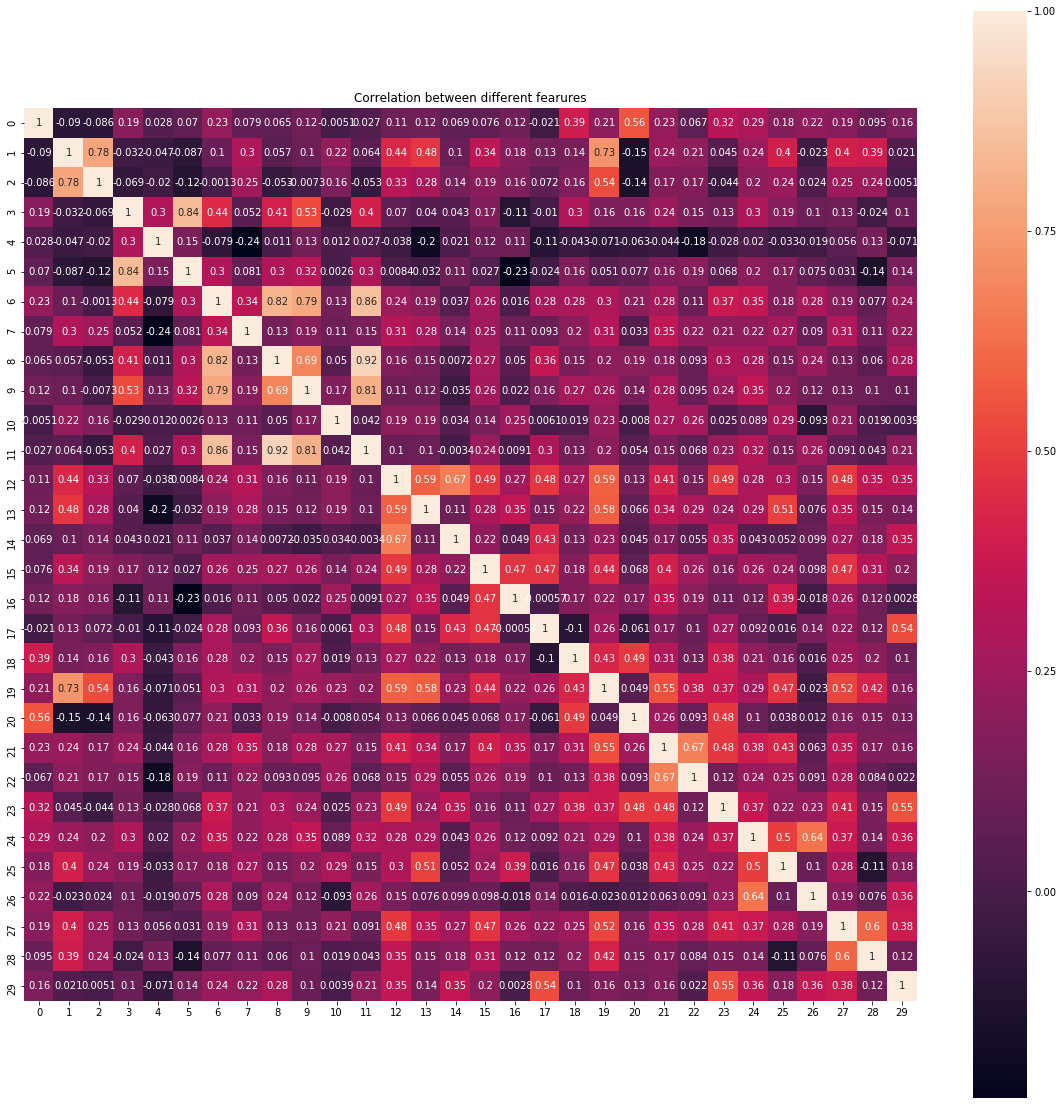

In [15]:
import seaborn as sns

CorrX = np.corrcoef(X.T)
plt.figure(figsize=(20,20))
sns.heatmap(CorrX, vmax=1, square=True,annot=True)

plt.title('Correlation between different fearures')

plt.show()